In [94]:
import pandas as pd

# Load the two CSV files
first_csv_path = '/u1/mdr614/On the compleness of review comments/Notebook_on the compleness/BERT_CONFU_AUTHOR/test_bert_author.xlsx'  # Replace with your first CSV file path
second_csv_path = '/u1/mdr614/On the compleness of review comments/Notebook_on the compleness/Prediction_of_reply/withAuthor_comments_others.csv'  # Replace with your second CSV file path

df1 = pd.read_excel(first_csv_path)
df2 = pd.read_csv(second_csv_path)

# Define the common columns to check
common_columns = ['Project', 'pullNumber', 'author', 'comment']

# Merge the two dataframes to identify rows in df2 that are also in df1
merged = pd.merge(df2, df1, on=common_columns, how='left', indicator=True)

# Keep only rows that are not in the first CSV (i.e., only keep rows where "_merge" == "left_only")
df_remaining = merged[merged['_merge'] == 'left_only'].drop(columns=['_merge'])

# Save the remaining rows to a new CSV file
output_file_path = 'other_remainingRows.csv'  # Specify your output file path
df_remaining.to_csv(output_file_path, index=False)

print(f"Remaining rows saved to {output_file_path}")


Remaining rows saved to other_remainingRows.csv


In [95]:
import pandas as pd

# Load the CSV file
file_path = 'All_together_apache_others.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Group by 'Project' and count occurrences of 0 and 1 in 'prediction'
counts = df.groupby('Project')['prediction_Bert'].value_counts().unstack(fill_value=0)

# Create a new DataFrame to store the results
result_df = pd.DataFrame({
    'Project': counts.index,
    'countof0': counts.get(0, 0),  # Get the count of 0, default to 0 if not present
    'countof1': counts.get(1, 0),  # Get the count of 1, default to 0 if not present
})

# Calculate the total
result_df['total'] = result_df['countof0'] + result_df['countof1']

# Save the result to a new CSV file
output_file_path = 'project_counts.csv'  # Specify the output file path
result_df.to_csv(output_file_path, index=False)

print(f"Results saved to {output_file_path}")



Results saved to project_counts.csv


['Project 1', 'Project 2', 'Project 3', 'Project 4', 'Project 5', 'Project 6', 'Project 7', 'Project 8', 'Project 9', 'Project 10', 'Project 11', 'Project 12', 'Project 13', 'Project 14', 'Project 15', 'Project 16', 'Project 17', 'Project 18', 'Project 19', 'Project 20', 'Project 21', 'Project 22', 'Project 23', 'Project 24', 'Project 25', 'Project 26', 'Project 27', 'Project 28', 'Project 29', 'Project 30', 'Project 31', 'Project 32', 'Project 33', 'Project 34', 'Project 35', 'Project 36', 'Project 37', 'Project 38', 'Project 39', 'Project 40', 'Project 41', 'Project 42', 'Project 43', 'Project 44', 'Project 45', 'Project 46', 'Project 47', 'Project 48', 'Project 49', 'Project 50', 'Project 51', 'Project 52', 'Project 53', 'Project 54', 'Project 55', 'Project 56', 'Project 57', 'Project 58', 'Project 59', 'Project 60', 'Project 61', 'Project 62', 'Project 63', 'Project 64', 'Project 65', 'Project 66', 'Project 67', 'Project 68', 'Project 69', 'Project 70', 'Project 71', 'Project 72', 

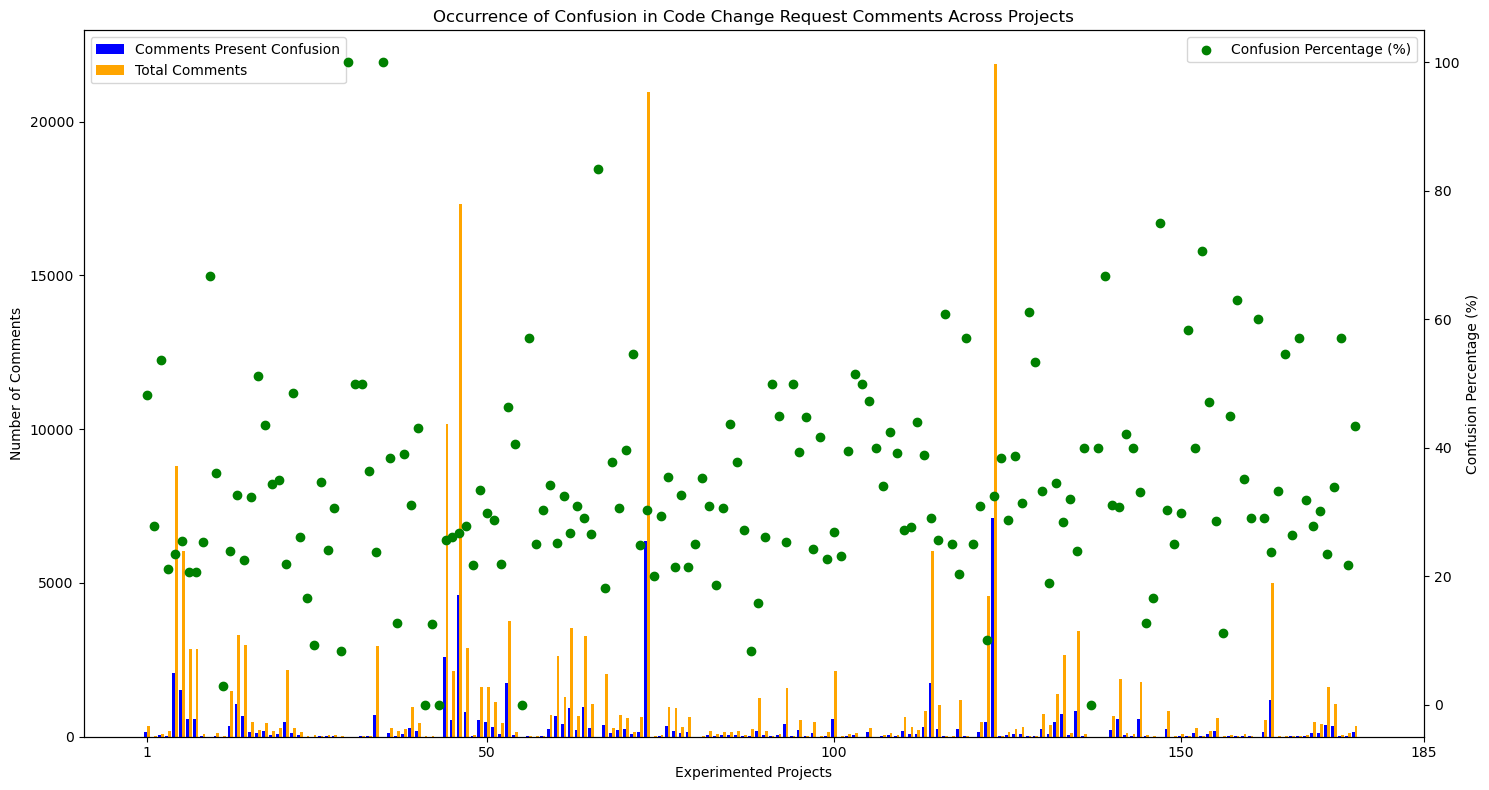

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)



# Sample data
np.random.seed(0)
projects = [f"Project {i}" for i in range(1, len(df['Project'].values)+1)]
comments_present_confusion = df['countof1'].values
comments_not_present_confusion = df['countof0'].values
total_comments = df['total'].values

print(projects)
print(len(comments_present_confusion))
print(len(total_comments))




# Create a DataFrame
df = pd.DataFrame({
    "Project": projects,
    "Comments Present Confusion": comments_present_confusion,
    "Total Comments": total_comments,
})

# Calculate confusion percentage
df['Confusion Percentage'] = df['Comments Present Confusion'] / df['Total Comments'] * 100

# Define confusion percentage ranges
ranges = [(0, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
range_labels = ['0-20%', '21-40%', '41-60%', '61-80%', '81-100%']

# Calculate frequency of confusion percentages within each range
frequencies = [(df['Confusion Percentage'] >= low) & (df['Confusion Percentage'] <= high) for low, high in ranges]
project_counts = [freq.sum() for freq in frequencies]

# Print the number of projects in each range
for label, count in zip(range_labels, project_counts):
    print(f"Number of projects in range {label}: {count}")

# Create a single figure with grouped bars and confusion percentage dots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Set bar width and x positions
bar_width = 0.40
x = np.arange(len(df))

# Plot bars for confusion comments
bar1 = ax1.bar(x - bar_width/2, df['Comments Present Confusion'], width=bar_width, 
               label='Comments Present Confusion', color='blue')

# Plot bars for total comments (using a neutral color for comparison)
bar2 = ax1.bar(x + bar_width/2, df['Total Comments'], width=bar_width, 
               label='Total Comments', color='orange')

# Create a second y-axis for confusion percentage
ax2 = ax1.twinx()

# Plot green dots for confusion percentage
ax2.scatter(x, df['Confusion Percentage'], color='green', marker='o', label='Confusion Percentage (%)')

# Labeling
ax1.set_xlabel('Experimented Projects')  # Updated x-axis title
ax1.set_ylabel('Number of Comments')
ax1.set_title('Occurrence of Confusion in Code Change Request Comments Across Projects')

# Set specific ticks for x-axis
ax1.set_xticks([0, 49, 99, 149, 184])  # Indices of the selected projects
ax1.set_xticklabels(['1', '50', '100', '150', '185'])  # Labels for the ticks

# Legend for bars
ax1.legend(loc='upper left')
ax2.set_ylabel('Confusion Percentage (%)')

# Add legend for the scatter plot
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


Number of projects in range 0-10%: 24
Number of projects in range 11-20%: 73
Number of projects in range 21-30%: 62
Number of projects in range 31-40%: 8
Number of projects in range 41-50%: 0
Number of projects in range 51-60%: 0
Number of projects in range 61-70%: 0
Number of projects in range 71-80%: 0
Number of projects in range 81-90%: 0
Number of projects in range 91-100%: 0


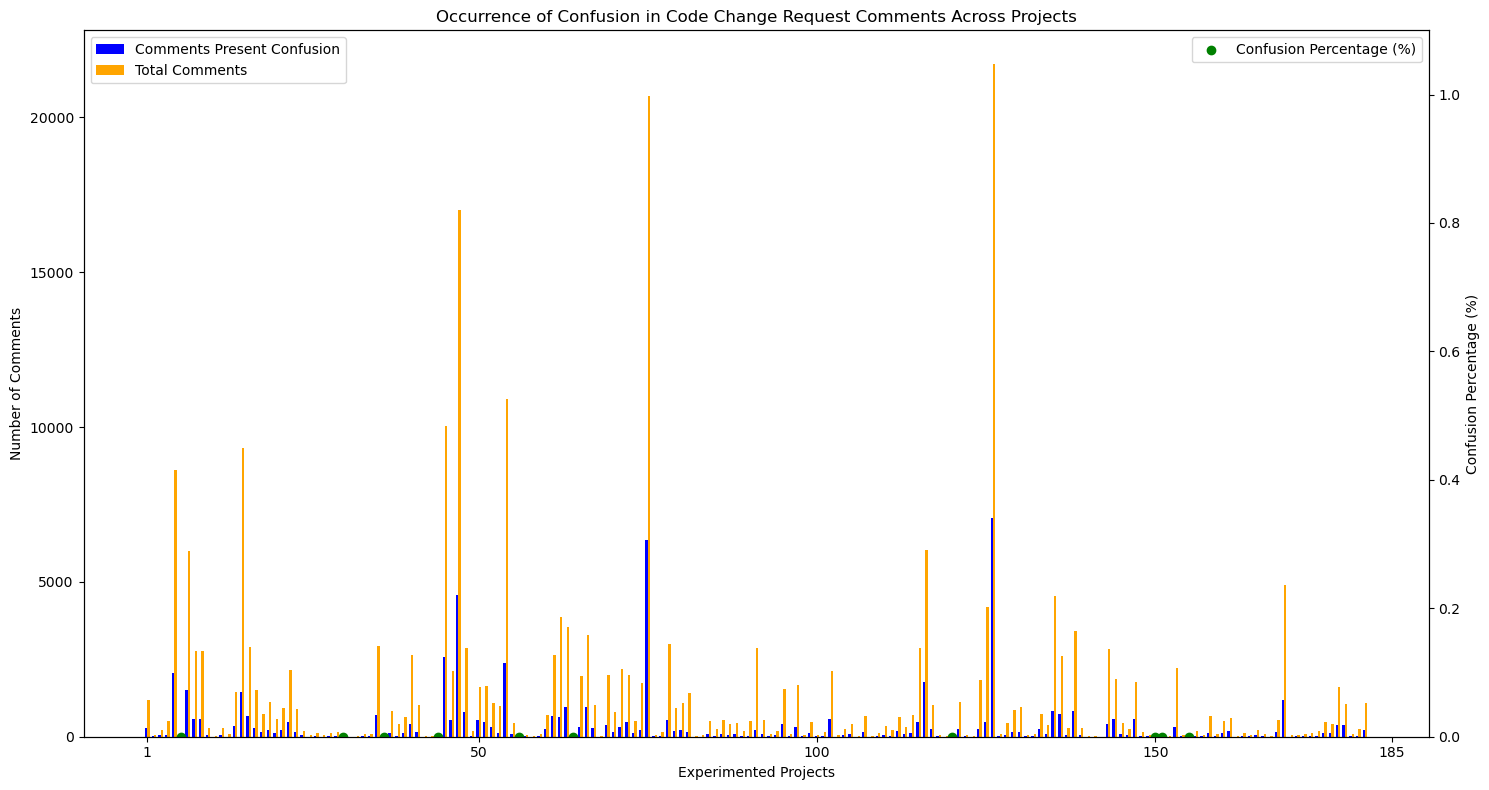

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Sample data (replace with your actual data)
np.random.seed(0)
projects = [f"Project {i}" for i in range(1, len(df['Project'].values)+1)]
comments_present_confusion = df['countof1'].values
comments_not_present_confusion = df['countof0'].values
total_comments = df['total'].values

# Create a DataFrame
df = pd.DataFrame({
    "Project": projects,
    "Comments Present Confusion": comments_present_confusion,
    "Total Comments": total_comments,
})

# Calculate confusion percentage
df['Confusion Percentage'] = df['Comments Present Confusion'] / df['Total Comments'] * 100

# Define confusion percentage ranges
ranges = [(0, 10),(11,20), (21, 30),(31,40), (41, 50),(51,60), (61, 70),(71,80), (81, 90),(91,100)]
range_labels = ['0-10%','11-20%','21-30%', '31-40%', '41-50%','51-60%', '61-70%','71-80%', '81-90%','91-100%']

# Calculate frequency of confusion percentages within each range
frequencies = [(df['Confusion Percentage'] >= low) & (df['Confusion Percentage'] <= high) for low, high in ranges]
project_counts = [freq.sum() for freq in frequencies]

# Print the number of projects in each range
for label, count in zip(range_labels, project_counts):
    print(f"Number of projects in range {label}: {count}")

# Create a single figure with grouped bars and confusion percentage dots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Set bar width and x positions with adjustment for visibility
bar_width = 0.35  # Reduced bar width to avoid overlapping labels

x = np.arange(len(df))

# Plot bars for confusion comments
bar1 = ax1.bar(x - bar_width/2, df['Comments Present Confusion'], width=bar_width,
                label='Comments Present Confusion', color='blue')

# Plot bars for total comments (using a neutral color for comparison)
bar2 = ax1.bar(x + bar_width/2, df['Total Comments'], width=bar_width,
                label='Total Comments', color='orange')

# Create a second y-axis for confusion percentage
ax2 = ax1.twinx()

# Plot green dots for confusion percentage
ax2.scatter(x, df['Confusion Percentage'], color='green', marker='o', label='Confusion Percentage (%)')

# **Adjusting Y-axis Limits:**

# Find the minimum non-zero value in "Comments Present Confusion"
min_non_zero_value = df["Comments Present Confusion"][df["Comments Present Confusion"] > 0].min()

# Set the y-axis limits (adjust the multiplier as needed)
plt.ylim(0, min_non_zero_value * 1.1)  # Adjust the multiplier to control padding

# Labeling
ax1.set_xlabel('Experimented Projects')  # Updated x-axis title
ax1.set_ylabel('Number of Comments')
ax1.set_title('Occurrence of Confusion in Code Change Request Comments Across Projects')

# Set specific ticks for x-axis (adjust based on your data)
ax1.set_xticks([0, 49, 99, 149, 184])
ax1.set_xticklabels(['1', '50', '100', '150', '185'])

# Legend for bars
ax1.legend(loc='upper left')
ax2.set_ylabel('Confusion Percentage (%)')

# Add legend for the scatter plot
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()

In [5]:
!pip install scipy

In [97]:
import pandas as pd

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Calculate the sum of 'total' and 'countof1'
sum_total = df['total'].sum()
sum_countof1 = df['countof1'].sum()

# Print the results
print(f"Sum of total: {sum_total}")
print(f"Sum of countof1: {sum_countof1}")


Sum of total: 249705
Sum of countof1: 58884


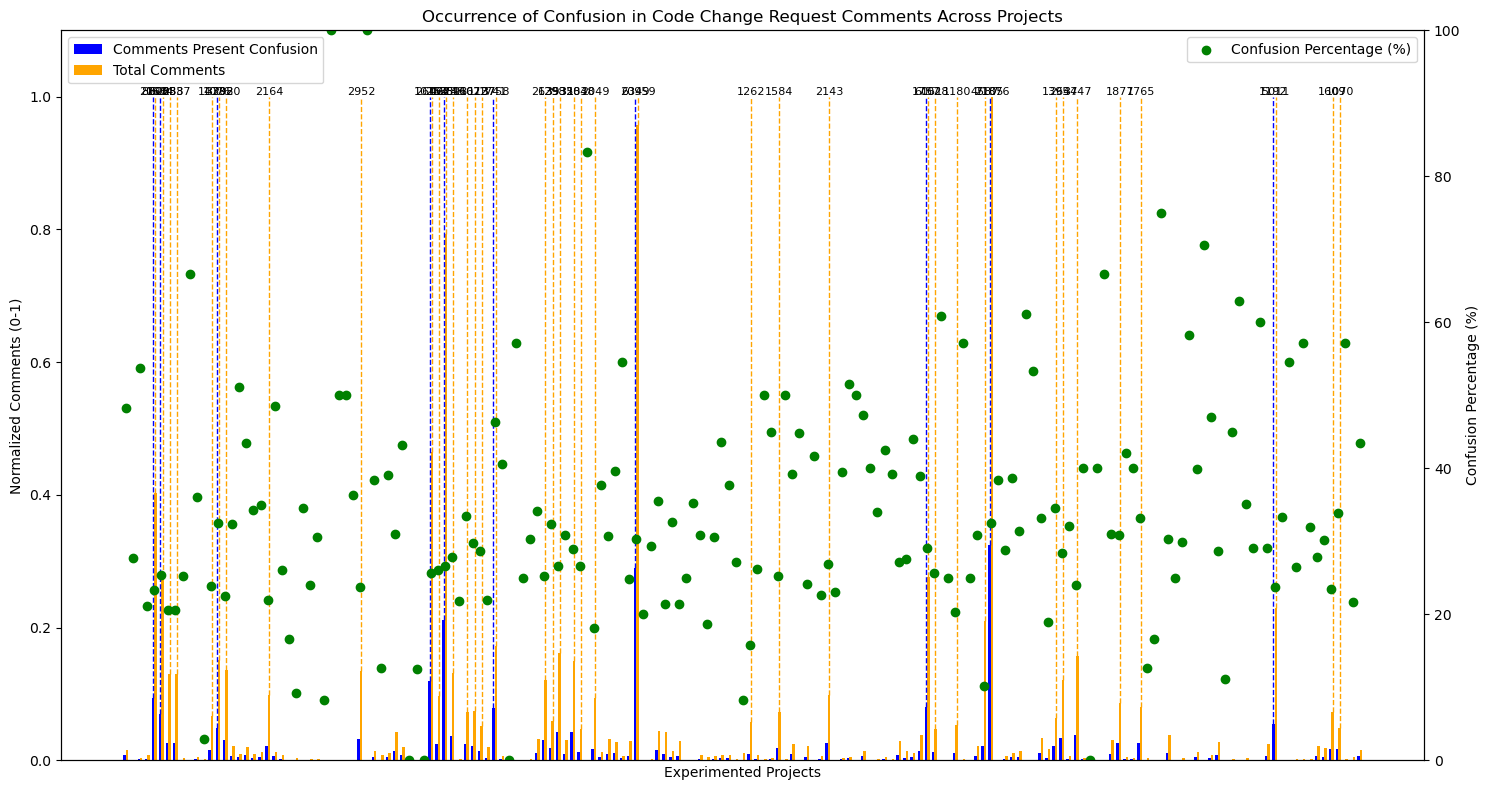

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your CSV file path
df = pd.read_csv(file_path)

# Sample data (replace with your actual data)
projects = [f"Project {i}" for i in range(1, len(df['Project'].values)+1)]
comments_present_confusion = df['countof1'].values
total_comments = df['total'].values

# Create a DataFrame
df = pd.DataFrame({
    "Project": projects,
    "Comments Present Confusion": comments_present_confusion,
    "Total Comments": total_comments,
})

# Calculate confusion percentage
df['Confusion Percentage'] = df['Comments Present Confusion'] / df['Total Comments'] * 100

# Define the normalization threshold
threshold = 1000
scale_factor = 0.1  # Adjust the scale factor for small values

# Normalize the values between 0 and 1
max_value = df[['Comments Present Confusion', 'Total Comments']].values.max()

df['Normalized Confusion'] = df['Comments Present Confusion'] / max_value
df['Normalized Total'] = df['Total Comments'] / max_value

# Create a single figure with grouped bars and confusion percentage dots
fig, ax1 = plt.subplots(figsize=(15, 8))

# Set bar width and x positions
bar_width = 0.35
x = np.arange(len(df))

# Plot normalized bars for Comments Present Confusion and Total Comments
bar1 = ax1.bar(x - bar_width/2, df['Normalized Confusion'], width=bar_width, label='Comments Present Confusion', color='blue')
bar2 = ax1.bar(x + bar_width/2, df['Normalized Total'], width=bar_width, label='Total Comments', color='orange')

# Plot the actual values with dotted lines for values above the threshold
for i, (conf, total, norm_conf, norm_total) in enumerate(zip(df['Comments Present Confusion'], df['Total Comments'], df['Normalized Confusion'], df['Normalized Total'])):
    if conf > threshold:
        # Dotted line for Comments Present Confusion
        ax1.plot([x[i] - bar_width/2, x[i] - bar_width/2], [norm_conf, 1], 'b--', lw=1)
        # Annotation for the actual value
        ax1.text(x[i] - bar_width/2, 1, f'{conf}', ha='center', va='bottom', fontsize=8)
    if total > threshold:
        # Dotted line for Total Comments
        ax1.plot([x[i] + bar_width/2, x[i] + bar_width/2], [norm_total, 1], 'orange', lw=1, linestyle='--')
        # Annotation for the actual value
        ax1.text(x[i] + bar_width/2, 1, f'{total}', ha='center', va='bottom', fontsize=8)

# Create a second y-axis for confusion percentage
ax2 = ax1.twinx()

# Plot green dots for confusion percentage
ax2.scatter(x, df['Confusion Percentage'], color='green', marker='o', label='Confusion Percentage (%)')

# Adjusting Y-axis Limits
ax1.set_ylim(0, 1.1)  # Adjust the Y-axis to include normalized bars and dotted lines
ax2.set_ylim(0, 100)

# Remove x-axis labels, keeping only "Experimented Projects"
ax1.set_xlabel('Experimented Projects')
ax1.set_xticks([])  # No individual labels for the projects

# Labeling
ax1.set_ylabel('Normalized Comments (0-1)')
ax1.set_title('Occurrence of Confusion in Code Change Request Comments Across Projects')

# Legend for bars
ax1.legend(loc='upper left')
ax2.set_ylabel('Confusion Percentage (%)')

# Add legend for the scatter plot
ax2.legend(loc='upper right')

# Adjust layout
plt.tight_layout()
plt.show()


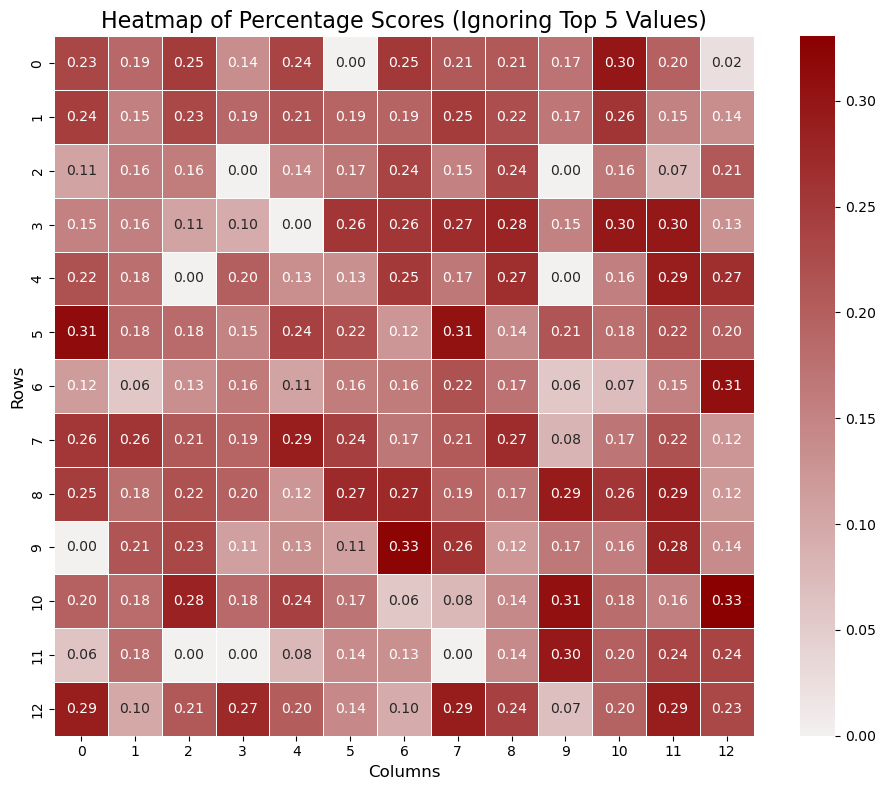

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate percentage of 'countof1' based on 'total'
df['percentage'] = df['countof1'] / df['total']

# Step 1: Ignore the highest five values
df_sorted = df.nlargest(5, 'percentage')
df_filtered = df[~df['percentage'].isin(df_sorted['percentage'])]

# Check if we have at least 169 values left
if len(df_filtered) < 169:
    print("Not enough data to create a 13x13 heatmap after excluding the top 5 values.")
else:
    # Step 2: Reshape the DataFrame into a 2D array (13x13)
    heatmap_data = df_filtered['percentage'].values[:169].reshape(13, 13)  # Only take the first 169 values

    # Step 3: Define a custom color palette with shades
    cmap = sns.light_palette("darkred", as_cmap=True)

    # Step 4: Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5)

    # Customize the plot
    plt.title("Heatmap of Percentage Scores (Ignoring Top 5 Values)", fontsize=16)
    plt.xlabel("Columns", fontsize=12)
    plt.ylabel("Rows", fontsize=12)

    # Show plot
    plt.tight_layout()
    plt.show()


In [107]:
import pandas as pd

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate percentage of 'countof1' based on 'total'
df['percentage'] = df['countof1'] / df['total']

# Step 1: Ignore the highest five values
df_sorted = df.nlargest(5, 'percentage')
df_filtered = df[~df['percentage'].isin(df_sorted['percentage'])]

# Check if we have at least 169 values left
if len(df_filtered) < 169:
    print("Not enough data to create a 13x13 heatmap after excluding the top 5 values.")
else:
    # Step 2: Describe the data that would be plotted as a boxplot
    boxplot_summary = df_filtered['percentage'].describe()

    # Output the boxplot statistics
    print("Boxplot Summary Statistics:")
    print(f"Count: {boxplot_summary['count']}")
    print(f"Mean: {boxplot_summary['mean']:.4f}")
    print(f"Standard Deviation: {boxplot_summary['std']:.4f}")
    print(f"Min: {boxplot_summary['min']:.4f}")
    print(f"25th Percentile (Q1): {boxplot_summary['25%']:.4f}")
    print(f"Median (Q2): {boxplot_summary['50%']:.4f}")
    print(f"75th Percentile (Q3): {boxplot_summary['75%']:.4f}")
    print(f"Max: {boxplot_summary['max']:.4f}")


Boxplot Summary Statistics:
Count: 177.0
Mean: 0.1834
Standard Deviation: 0.0789
Min: 0.0000
25th Percentile (Q1): 0.1385
Median (Q2): 0.1860
75th Percentile (Q3): 0.2407
Max: 0.3305


In [100]:
import pandas as pd

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Step 1: Ignore the highest five values based on 'total'
df_sorted = df.nlargest(5, 'total')
df_filtered = df[~df['total'].isin(df_sorted['total'])]

# Check if we have at least 169 values left
if len(df_filtered) < 169:
    print("Not enough data to create a 13x13 heatmap after excluding the top 5 values.")
else:
    # Step 2: Describe the 'total' column data
    boxplot_summary = df_filtered['total'].describe()

    # Output the boxplot statistics for 'total'
    print("Boxplot Summary Statistics for 'total' column:")
    print(f"Count: {boxplot_summary['count']}")
    print(f"Mean: {boxplot_summary['mean']:.4f}")
    print(f"Standard Deviation: {boxplot_summary['std']:.4f}")
    print(f"Min: {boxplot_summary['min']:.4f}")
    print(f"25th Percentile (Q1): {boxplot_summary['25%']:.4f}")
    print(f"Median (Q2): {boxplot_summary['50%']:.4f}")
    print(f"75th Percentile (Q3): {boxplot_summary['75%']:.4f}")
    print(f"Max: {boxplot_summary['max']:.4f}")


Boxplot Summary Statistics for 'total' column:
Count: 176.0
Mean: 962.3182
Standard Deviation: 1460.7264
Min: 1.0000
25th Percentile (Q1): 67.5000
Median (Q2): 401.0000
75th Percentile (Q3): 1145.0000
Max: 9338.0000


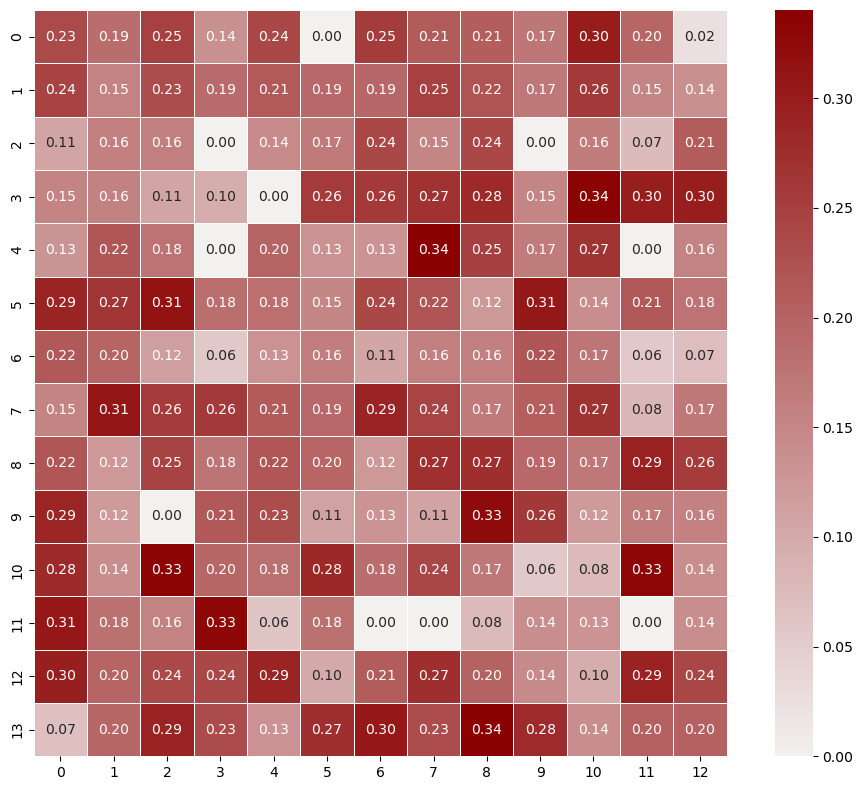

In [106]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'project_counts.csv'  # Replace with your actual file path
df = pd.read_csv(file_path)

# Calculate percentage of 'countof1' based on 'total'
df['percentage'] = df['countof1'] / df['total']

# Step 1: Ignore the highest five values
df_sorted = df.nlargest(0, 'percentage')
df_filtered = df[~df['percentage'].isin(df_sorted['percentage'])]

# Check if we have at least 169 values left
if len(df_filtered) < 182:
    print("Not enough data to create a 13x13 heatmap after excluding the top 5 values.")
else:
    # Step 2: Reshape the DataFrame into a 2D array (13x13)
    heatmap_data = df_filtered['percentage'].values[:182].reshape(14, 13)  # Only take the first 169 values

    # Step 3: Define a custom color palette with shades
    cmap = sns.light_palette("darkred", as_cmap=True)

    # Step 4: Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(heatmap_data, cmap=cmap, annot=True, fmt=".2f", cbar=True, square=True, linewidths=0.5)

    # Remove labels and title
    plt.title("")  # Remove title
    plt.xlabel("")  # Remove x-label
    plt.ylabel("")  # Remove y-label

    # Save figure as PDF without whitespace around the plot
    plt.savefig("incomplete CCR fequency.pdf", format='pdf', bbox_inches='tight', pad_inches=0)
    # Show plot
    plt.tight_layout()
    plt.show()
